#**In-depth Analysis of Dataset and Prediction**
👋 Hello! I'm Alhassan Mohammed Nuruddin, Let's dive into my work

## Table of Contents

1. [Importing Libraries](#importing-libraries)
2. [Loading Dataset](#loading-dataset)
3. [Exploratory Data Analysis - EDA](#exploratory-data-analysis-eda)
   1. [Basic Information about Dataset](#basic-information)
   2. [Correlation Matrix](#corr)
   3. [Pairwise Relationships](#pairwise-relationships)
   4. [Top Hosts](#top-hosts)
   5. [Neighbourhood Groups](#neighbourhood-groups)
   6. [Visualizing Room Types and Neighborhood Groups](#visualizing-neighborhood-groups)
   7. [Price Variation Across Neighborhood Groups](#price-neighborhood-groups)
   8. [Price Distribution by Neighborhood Groups - Prices Under $500](#prices-under-500)
   9. [Neighbourhood across Room Type](#across-room-type)
   10. [Geospatial Analysis: Longitude and Latitude Visualization](#geospatial-analysis-longitude-and-latitude-visualization)
   11. [Analysis of Number of Reviews](#analysis-of-number-of-reviews)
   12. [Price Univariate Analysis](#price-univariate-analysis)
   13. [Minimum Nights](#minimum-nights)
   14. [Distribution of Listings](#distribution-of-listings)
   15. [Availability](#availability)
4. [Dataset Analysis: Key Insights](#dataset-analysis-key-insights)
5. [Modelling](#modelling)
   1. [Linear Regression](#linear-regression)
   2. [Random Forest Regressor](#random-forest-regressor)
   3. [Neural Networks](#neural-networks)
6. [Comparing the models](#comparative)


Find dataset here: [Dataset](https://drive.google.com/file/d/1FQBGyhTM9SIfrJfEnHPYkIFn3Q5TOU4j/view?usp=sharing)

This project involves an in-depth analysis of the dataset to gain insights and build predictive models. The project is structured as follows:

1. **Importing Libraries:** The project begins by importing the necessary libraries and packages required for data analysis, visualization, and machine learning.

2. **Loading Dataset:** The dataset is loaded into the notebook for further analysis.

3. **Exploratory Data Analysis - EDA:** EDA is performed to thoroughly understand the dataset.
   - **Basic Information:** A brief overview of the dataset's structure and data types.
   - **Correlation Matrix:** Analyzing the correlation between numerical variables using a correlation matrix.
   - **Pairwise Relationships:** Visualizing pairwise relationships among numerical attributes.
   - **Top Hosts:** Identifying hosts with the most listings.
   - **Neighbourhood Groups:** Exploring the distribution of listings across different neighbourhood groups.
   - **Room Types and Neighborhood Groups:** Visualizing room types occupied by neighbourhood groups.
   - **Price Variation Across Neighborhood Groups:** Examining how prices vary across different neighbourhood groups.
   - **Price Distribution by Neighborhood Groups:** Analyzing price distribution within specific price ranges and neighbourhood groups.
   - **Neighbourhood across Room Type:** Exploring the distribution of neighbourhoods across different room types.
   - **Geospatial Analysis:** Visualizing the geographical distribution of listings using longitude and latitude data.
   - **Analysis of Number of Reviews:** Investigating the distribution and patterns of the number of reviews.
   - **Price Univariate Analysis:** Analyzing the distribution and characteristics of the price variable.
   - **Minimum Nights:** Exploring the minimum nights required for bookings.
   - **Distribution of Listings:** Understanding the distribution of listings across different attributes.
   - **Availability:** Investigating the availability of listings throughout the year.

4. **Dataset Analysis: Key Insights:** Summarizing the key insights obtained from the EDA, including price distribution, neighbourhood popularity, and room type preferences.

5. **Modelling:** Building and evaluating predictive models for price prediction.
   - **Linear Regression:** Training a linear regression model for price prediction.
   - **Random Forest Regressor:** Building a random forest regressor model for improved price prediction.
   - **Neural Networks:** Implementing a neural network model to predict listing prices.

The project culminates in comprehensive insights into various aspects of the dataset, from geographical distribution and price analysis to predictive modeling using machine learning techniques. This analysis provides valuable information for both hosts and travelers looking to better understand listing characteristics and make informed decisions.

##Importing Libraries <a name="importing-libraries"></a>

In [2]:
# Importing the librabries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.feature_column import bucketized_column, crossed_column, indicator_column, numeric_column, embedding_column
from tensorflow.keras.layers import Dense, Dropout, DenseFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## **Loading Dataset**<a name="loading-dataset"></a>
I uploaded the dataset onto my github and *fetches* it from there

In [3]:
# Featching data from my github
data = pd.read_csv("https://raw.githubusercontent.com/mohammednuruddin/minohealthdata/main/data%20-%20data.csv")

## **Exploratory Data Analysis - EDA** <a name="exploratory-data-analysis-eda"></a>

### Basic Information about dataset <a name="basic-information"></a>

In [13]:
#Checking first 5 rows of the dataset
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [16]:
#number of rows in the dataset
len(data)

48895

In [19]:
#Datatypes of the various attributes
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [21]:
#Checking for the number of null values present in each attribute fo the dataset
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Missing Values Overview:**
The dataset presents minimal missing values across most attributes, with the "name" column having 16 missing entries and the "host_name" column having 21. The "last_review" and "reviews_per_month" columns exhibit 10,052 missing values each, possibly indicating listings with no reviews. Overall, the geographical, pricing, and booking-related attributes are complete, while handling missing values in review-related columns might be essential for accurate analyses.


In [4]:
# Dropping irrelevant attributes
data.drop(['id','host_name','last_review', 'name', 'host_id'], axis=1, inplace=True)
#examing the changes
data.head(3)

name  ...  availability_365
0   Clean & quiet apt home by the park  ...               365
1                Skylit Midtown Castle  ...               355
2  THE VILLAGE OF HARLEM....NEW YORK !  ...               365

[3 rows x 13 columns]

In [5]:
# Replacing NaN values of reviews_per_month with 0
data['reviews_per_month'].fillna(0,inplace = True)
#examing changes
data.reviews_per_month.isnull().sum()

0

### Correlation Matrix <a name="corr"></a>

<ipython-input-64-dff020e25490>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


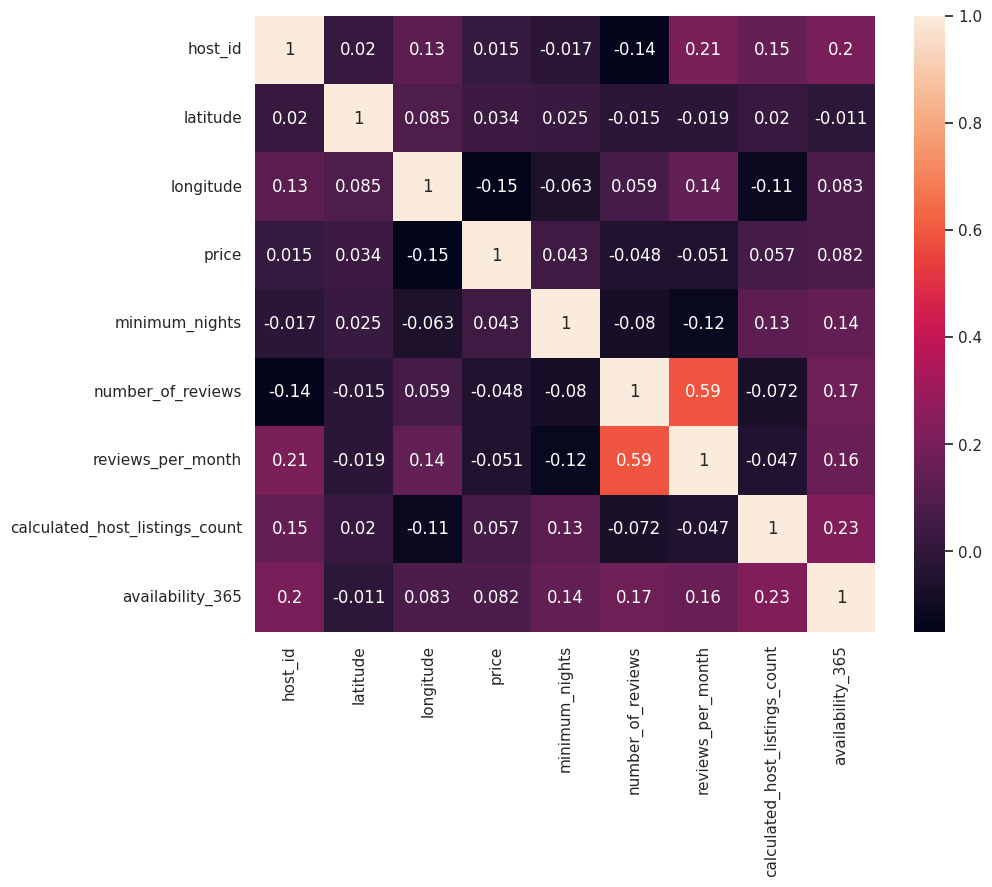

In [64]:
sns.heatmap(data.corr(),annot=True)
plt.show()

### Pairwise Relationships <a name="pairwise-relationships"></a>

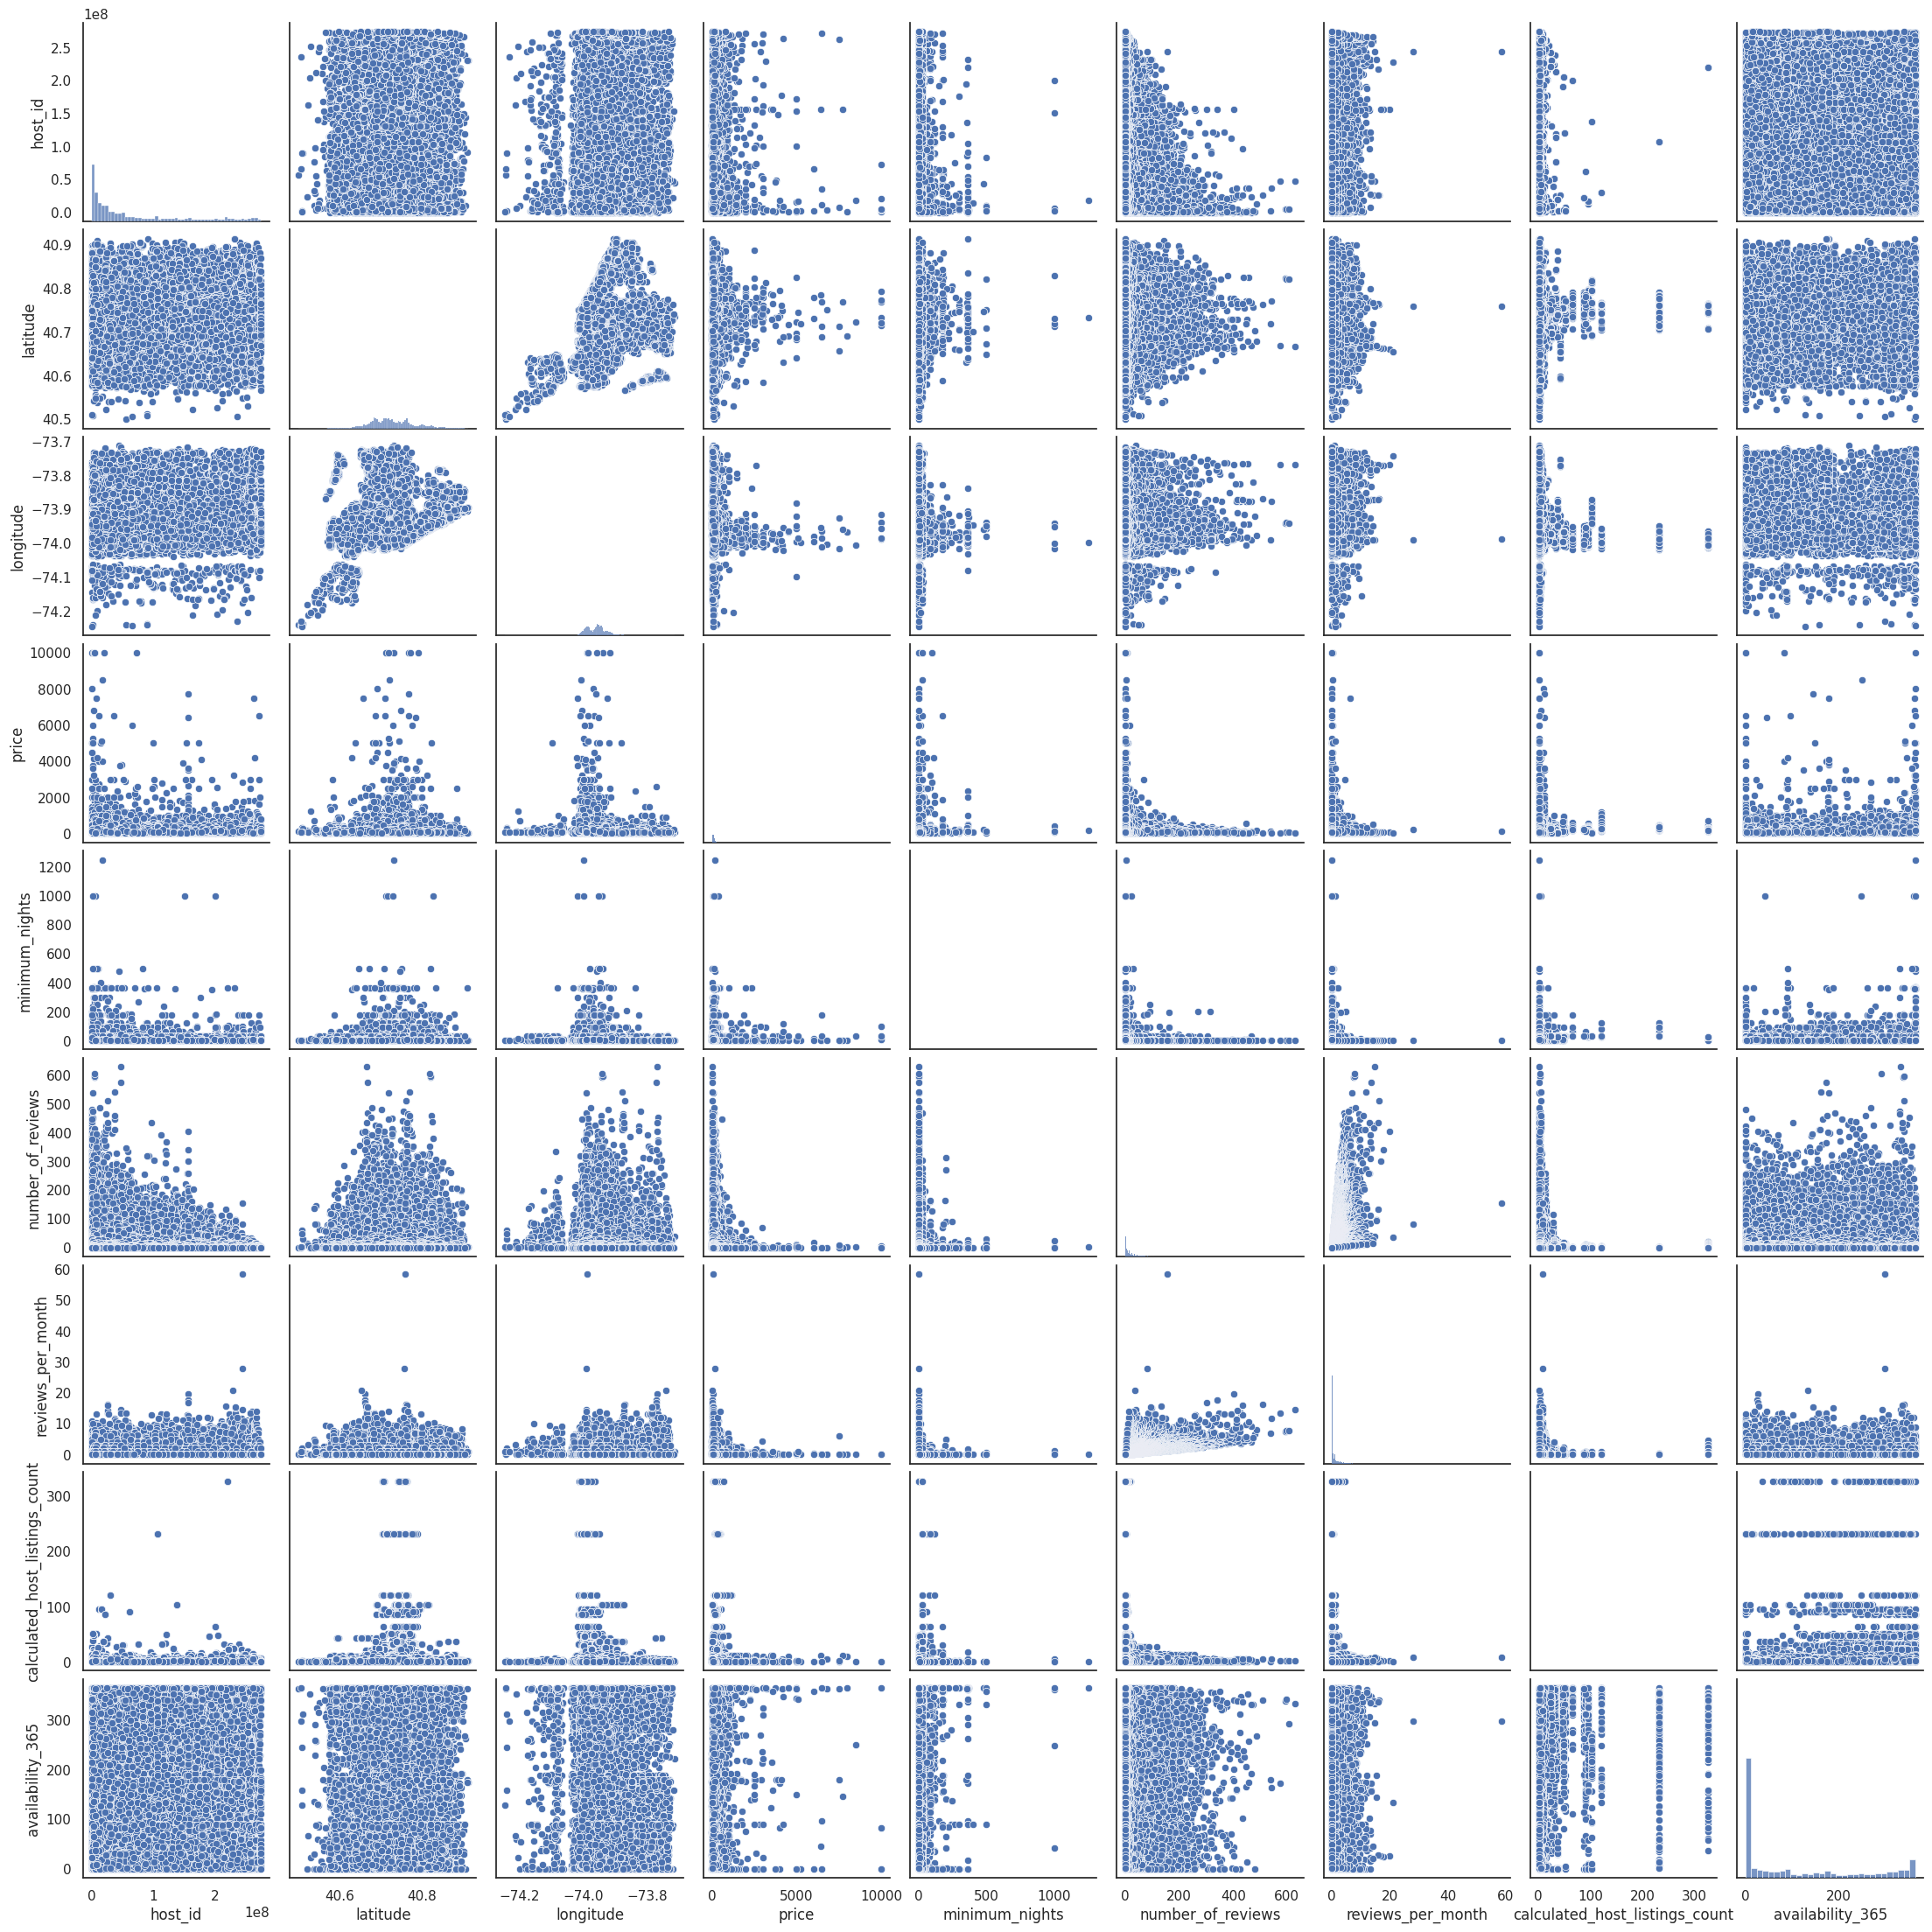

In [59]:
sns.pairplot(data)
plt.show()

The pairplot visualization provides valuable insights into the dataset's attribute relationships. Notably, there's no strong linear connection between price and availability, indicating that price alone doesn't dictate listing availability throughout the year. Similarly, higher prices don't consistently correlate with elevated review counts or reviews per month, suggesting that pricing isn't the sole influencer of listing popularity. The connection between reviews and availability is moderately pronounced, indicating that listings with greater availability tend to have a wider range of review counts. Additionally, a positive correlation is observed between the number of reviews and reviews per month, implying sustained guest interest in listings with higher review activity. The visualization also highlights the inverse relationship between minimum nights and availability, indicating that shorter stays might lead to higher listing turnover and availability. These insights underscore the complexity of the dataset and encourage further in-depth analysis to uncover deeper patterns and correlations.

### Top Hosts <a name="top-hosts"></a>

In [6]:
#let's see what hosts (IDs) have the most listings on platform and taking advantage of this service
top_host=data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [83]:
# we can confirm the fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=data.calculated_host_listings_count.max()
top_host_check

327

In [43]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [8]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

Host_ID  P_Count
0  219517861      327
1  107434423      232
2   30283594      121
3  137358866      103
4   16098958       96
5   12243051       96
6   61391963       91
7   22541573       87
8  200380610       65
9    7503643       52

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

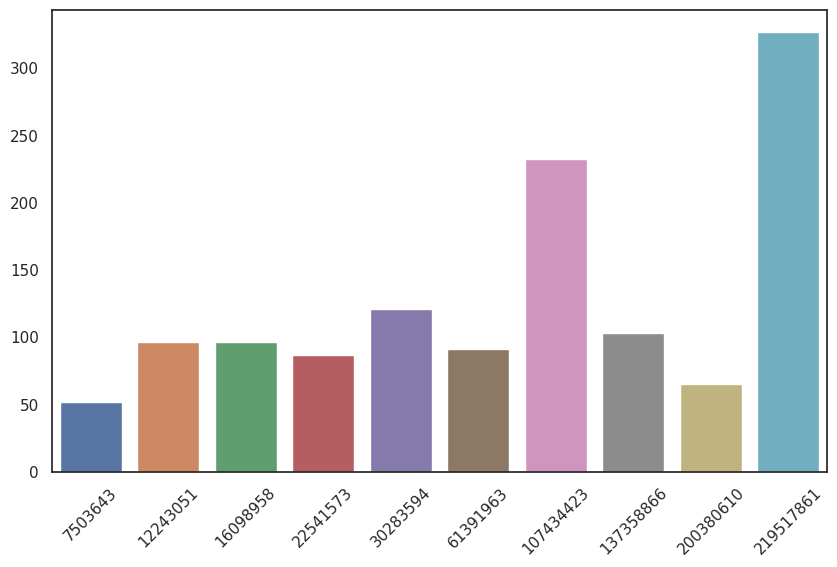

In [58]:
# Visualizing Hosts with the Most Listings
plt.figure(figsize=(10, 6))
viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df)
viz_1.set_title('')
viz_1.set_ylabel('')
viz_1.set_xlabel('')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.

### Neighbourhood Groups <a name="neighbourhood-groups"></a>

**Visualizing the distribution of listings across different neighborhood groups using a bar plot** provides insights into the relative share of each group, helping to grasp the distribution of listings in various areas of interest.

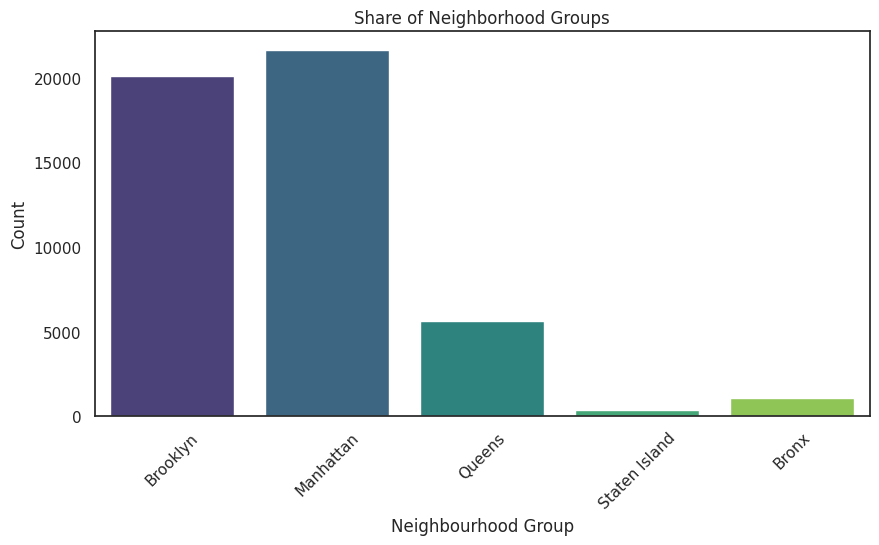

In [103]:
plt.figure(figsize=(10, 5))

sns.countplot(x="neighbourhood_group", data=data, palette="viridis")

plt.title("Share of Neighborhood Groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

Manhatten followed by Brooklyn have the highest share of hotels



<Axes: ylabel='neighbourhood_group'>

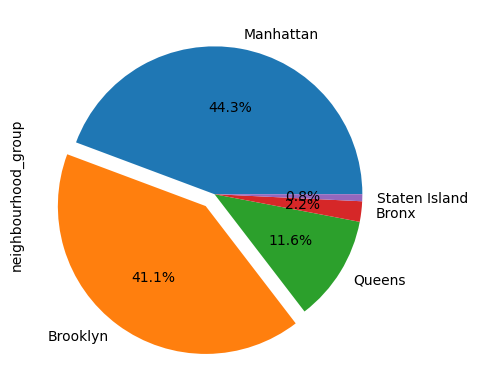

In [31]:
data['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%')

### Visualizing Room Types and Neighborhood Groups <a name="visualizing-neighborhood-groups"></a>

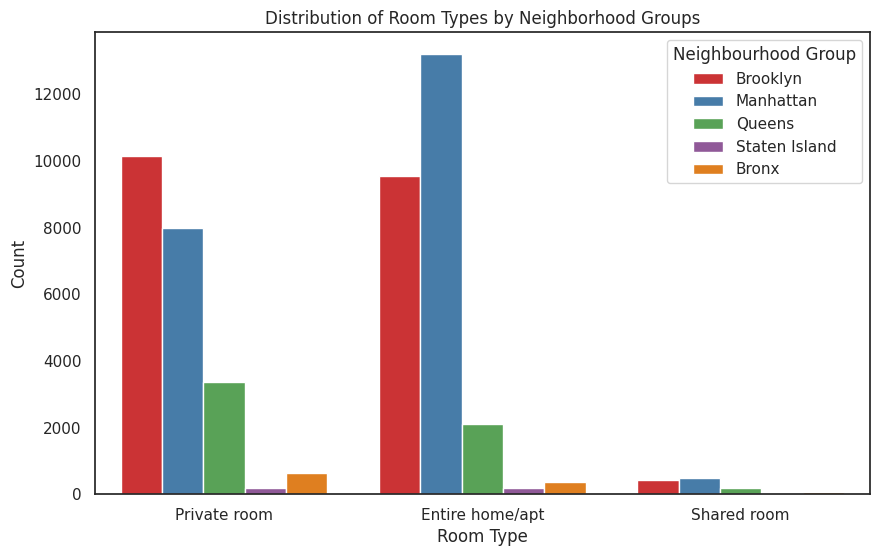

In [104]:
plt.figure(figsize=(10, 6))

sns.countplot(x='room_type', hue='neighbourhood_group', data=data, palette='Set1')

plt.title("Distribution of Room Types by Neighborhood Groups")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.legend(title="Neighbourhood Group")
plt.xticks(rotation=0)

plt.show()

 The prevalent room type is "Entire home/apt" across all neighborhoods, followed by "Private room" and a much less frequent "Shared room." This distribution indicates that guests generally prefer having an entire home or apartment to themselves. Notably, preferences diverge among neighborhood groups: Manhattan tends to feature more "Entire home/apt" listings, while Brooklyn and Queens showcase a balanced mix of "Entire home/apt" and "Private room" accommodations. The scarcity of "Shared room" listings, particularly in Manhattan and Queens, suggests a niche demand for this type of arrangement. This analysis offers a nuanced understanding of room type preferences within different neighborhoods, providing valuable insights for hosts and travelers alike.

In [34]:
##Grouping the neighbourhoods and having a look at the price distributions
n_group = data.groupby('neighbourhood_group').describe()
n_group.xs('price',axis = 1)

count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

The summary statistics reveal variations in average listing prices across different neighborhood groups in New York City, with Manhattan having the highest mean price 196.88 and the Bronx showing the lowest 87.50.

### Price Variation Across Neighborhood Groups <a name="price-neighborhood-groups"></a>





<ipython-input-36-d3ba4c05f76e>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='neighbourhood_group', y='price', data=data, palette='Set1')


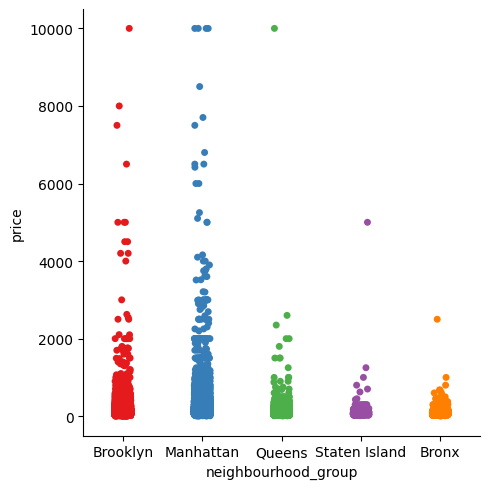

In [36]:
sns.catplot(x='neighbourhood_group', y='price', data=data, palette='Set1')


The plot highlights a predominant concentration of data points below the 1000 mark, despite the presence of a few high values. This distribution provides insight into the general price range across different neighborhood groups.

### Price Distribution by Neighborhood Groups - Prices Under $500 <a name="prices-under-500"></a>

<Axes: xlabel='neighbourhood_group', ylabel='price'>

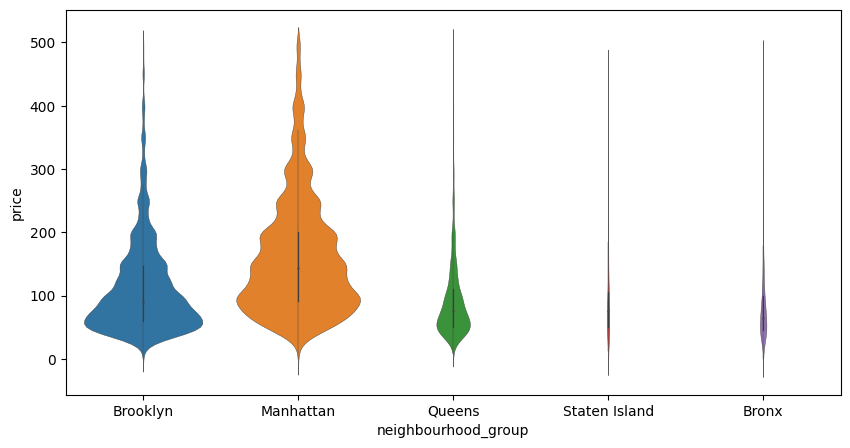

In [37]:
data1 =data[data['price']<500]
plt.figure(figsize = (10,5))
sns.violinplot(x = 'neighbourhood_group', y = 'price', data = data1, scale = 'count', linewidth = 0.3)

This violin plot is a depiction of the density and distribution of price in different neighbourhoods. The width of the violins is scaled by the number of observations in that bin. Both Brooklyn and Manhattan has many listings around the price 100 but Manhattan has more listings with a greater price.

In [51]:
#finding out top 10 neighbourhoods
data.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

### Neighbourhood across Room Type <a name="across-room-type"></a>

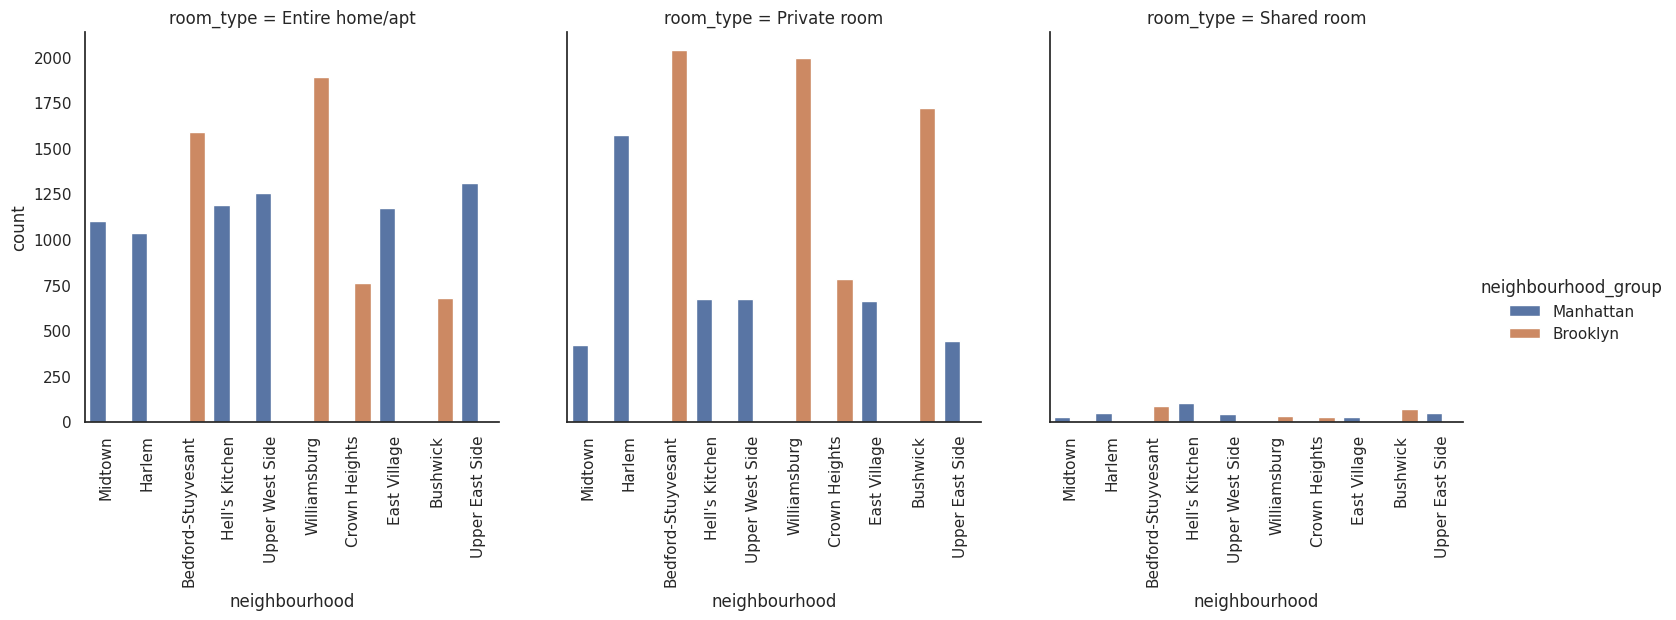

In [54]:
sub_7=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

We employ catplot to explore room type distributions in the top ten most-listed neighborhoods. Divided into three subplots using the column parameter, we contrast the availability of room types across neighborhoods. Key observations include the scarcity of "Shared room" listings among high-listing neighborhoods, strong representation of Manhattan and Brooklyn boroughs, and the prominence of specific neighborhoods like Bedford-Stuyvesant and Williamsburg in Manhattan, and Harlem in Brooklyn. Utilizing the hue parameter color-codes room types for easy comparison. This data-driven approach aids travelers in understanding room availability and assists hosts in tailoring offerings to neighborhood preferences, highlighting the power of exploratory visualization in strategic decision-making.

### **Geospatial Analysis: Longitude and Latitude Visualization** <a name="geospatial-analysis-longitude-and-latitude-visualization"></a>


In [ ]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=data.latitude, x=data.longitude, hue=data.neighbourhood_group,palette="coolwarm")
plt.show()

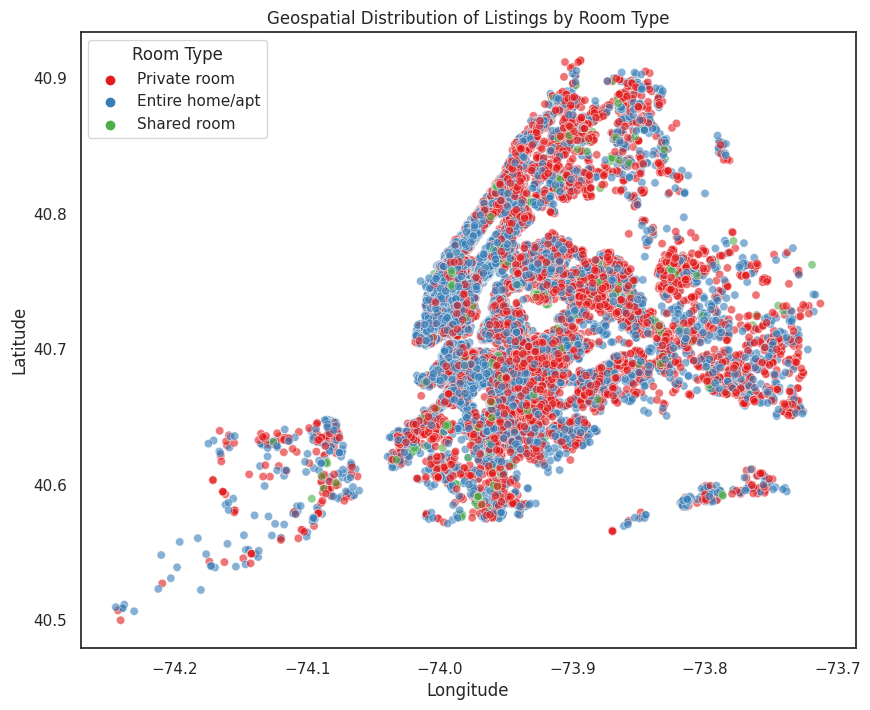

In [105]:
scatterplot = sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.room_type, palette='Set1', alpha=0.6)
plt.title("Geospatial Distribution of Listings by Room Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Room Type")
plt.show()

The scatter plot that visually maps the geographical distribution of listings by room type unveils notable patterns. "Entire home/apt" listings are prominently spread throughout various locations, reflecting the popularity of having an entire space for oneself. "Private room" accommodations exhibit a similar distribution, offering a range of options across the city. Interestingly, "Shared room" listings are fewer and primarily concentrated in specific areas, indicating a niche presence. This distribution aligns with the preferences revealed earlier, where entire accommodations and private rooms are favored. The visualization underscores how room types are not only influenced by traveler preferences but also influenced by the spatial dynamics of the city, catering to different needs and experiences.

In [85]:
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

### Number of Reviews <a name="analysis-of-number-of-reviews"></a>

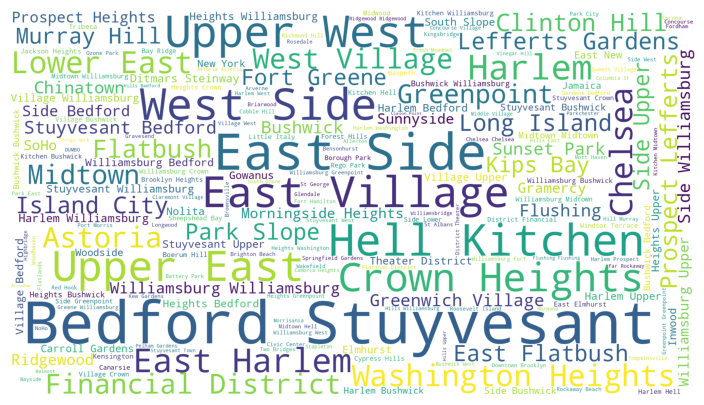

In [106]:
plt.subplots(figsize=(15,5))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

### Price Univariate Analysis <a name="price-univariate-analysis"></a>

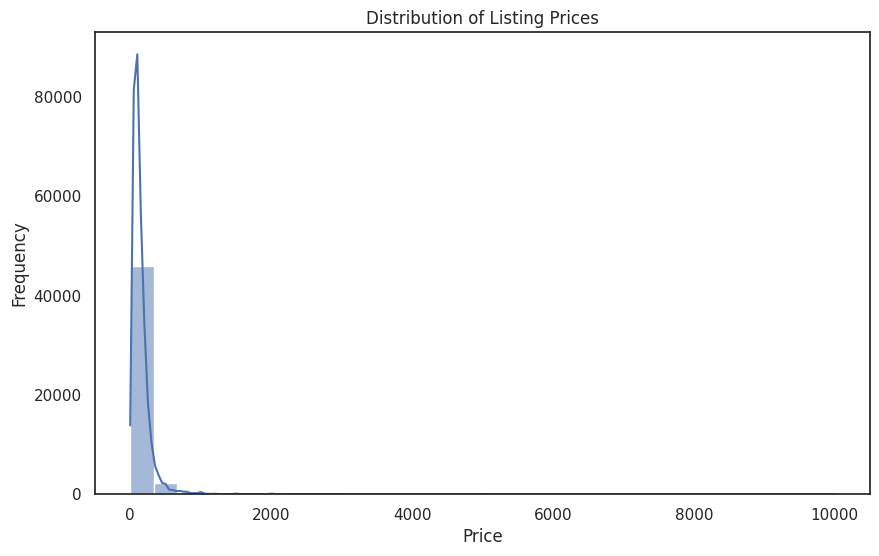

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [87]:
price_stats = data['price'].describe()
print(price_stats)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


The univariate analysis of the "price" attribute uncovers a right-skewed distribution, where most listings have lower prices while a few exhibit higher values. The mean price surpasses the median, indicating the influence of higher-priced outliers. The spread is considerable, as denoted by a notable standard deviation. Half of the listings fall within a range of $60 to $150, while the remaining half extends to higher prices. These findings offer a succinct overview of the price distribution's shape, central tendencies, and variability, laying the groundwork for deeper explorations.

### Minimum Nights <a name="minimum-nights"></a>

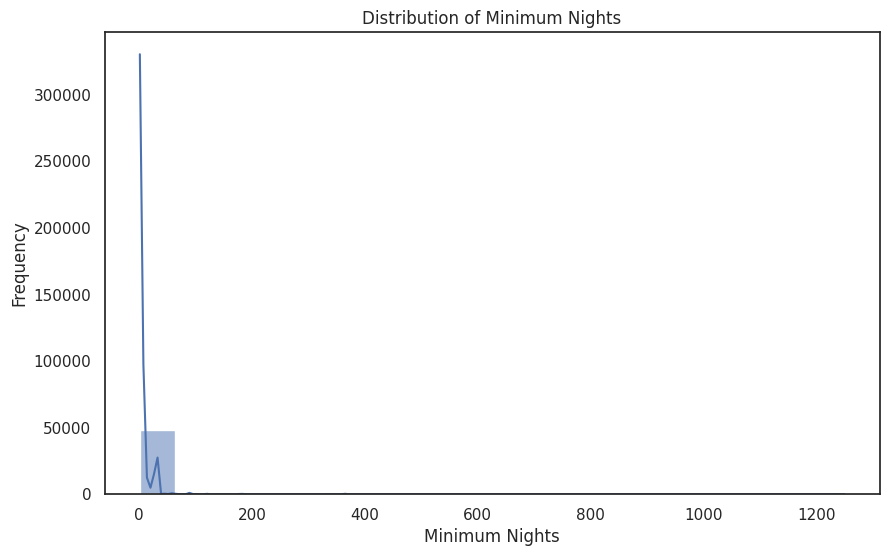

In [89]:
# Univariate Analysis: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['minimum_nights'], bins=20, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

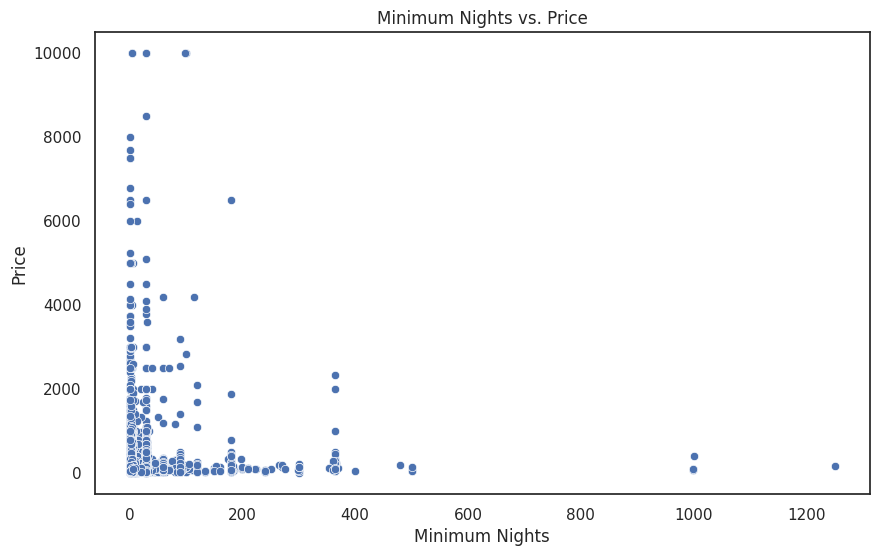

In [90]:
# Bivariate Analysis: Minimum Nights vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='price', data=data)
plt.title('Minimum Nights vs. Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

Exploring the relationship between "minimum_nights" and listing prices, a nuanced picture emerges. While there isn't a straightforward linear connection between minimum nights and price, the scatter plot suggests a wide variation in prices for different minimum stay durations. This signifies that factors beyond minimum stay, such as property features and location, substantially impact pricing decisions.

### Distribution of Listings <a name="distribution-of-listings"></a>

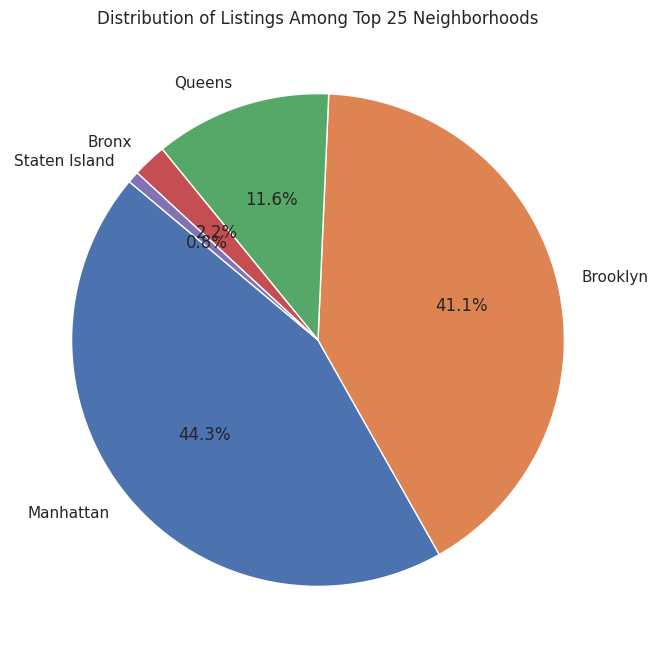

In [95]:
plt.figure(figsize=(18,8))
top_neighbourhoods = data['neighbourhood_group'].value_counts()[:25]

# Create a pie chart
plt.pie(top_neighbourhoods, labels=top_neighbourhoods.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Listings Among Top 25 Neighborhoods')
plt.show()

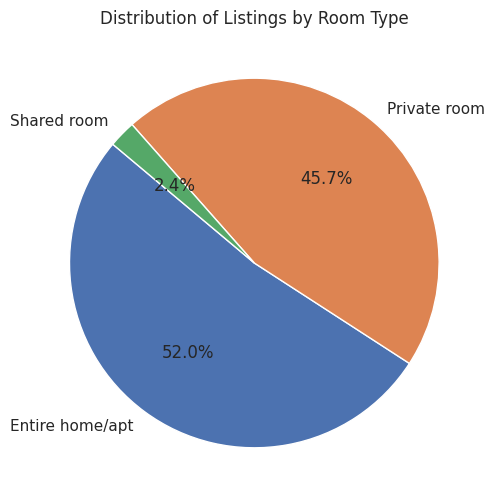

In [96]:
plt.figure(figsize=(8, 6))

# Calculate the count of each room type
room_type_counts = data['room_type'].value_counts()

# Create a pie chart
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Listings by Room Type')
plt.show()

From the first pie chart that visualizes the distribution of listings among the top 25 neighborhoods, the findings indicate that the listings are not evenly distributed across neighborhoods. The chart highlights the dominance of specific neighborhoods, like Manhantan followed by Brooklyn. This suggests that certain neighborhoods are more popular or attractive for listings, potentially due to factors like location, amenities, or cultural attractions.

The second pie chart, illustrating the distribution of listings by room type, reveals the composition of room types among the listings. The findings demonstrate that "Entire home/apartment" listings constitute a significant portion, followed by "Private room" and "Shared room" listings. This indicates that guests often prefer having the entire space to themselves, making it the most common room type among the listings. The presence of "Shared room" listings suggests a niche market, appealing to travelers seeking more budget-friendly accommodations or unique experiences.

### Availability <a name="availability"></a>

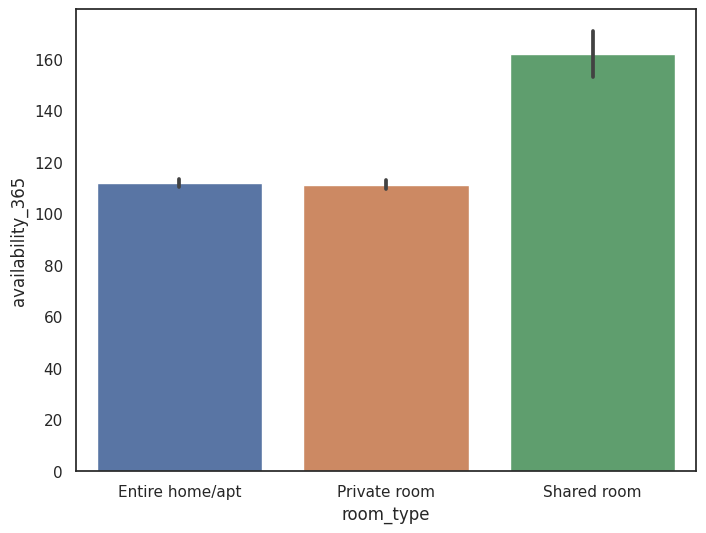

In [108]:
#room_type - availability_365
plt.figure(figsize=(8, 6))
result = data.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='room_type', y="availability_365", data=data, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

<Figure size 1800x800 with 0 Axes>

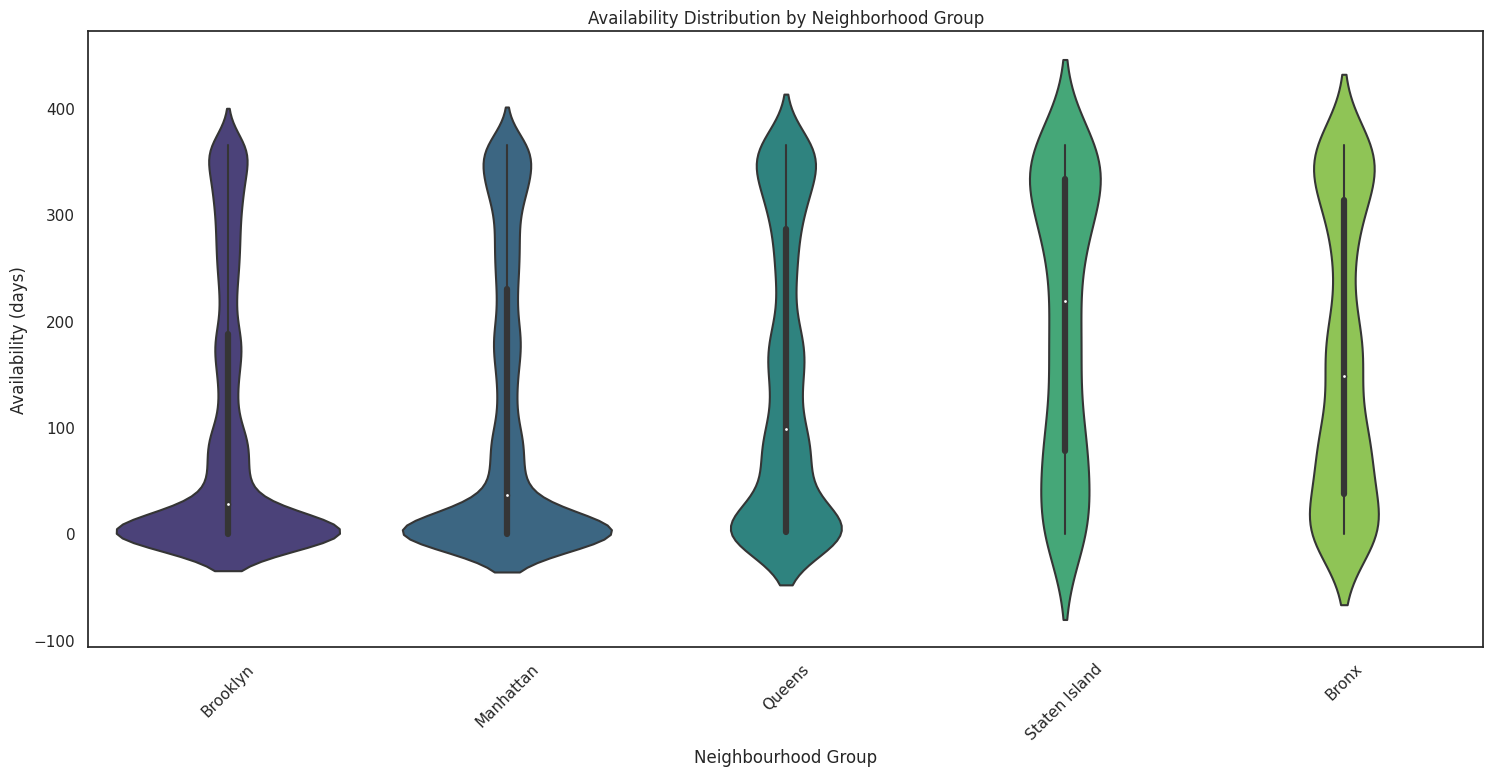

In [112]:
plt.figure(figsize=(18, 8))

# Create a violin plot using Seaborn
sns.violinplot(x='neighbourhood_group', y='availability_365', data=data, palette='viridis')

plt.title("Availability Distribution by Neighborhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Availability (days)")
plt.xticks(rotation=45)

plt.show()

**Room Type - Availability Analysis:**

The bar plot illustrating the median availability of different room types reveals valuable insights. "Entire home/apt" and "Private room" listings generally exhibit lower median availability compared to "Shared room" listings. This could be due to hosts being more cautious about offering entire homes or private rooms for extended periods, while shared accommodations might have more flexible availability. This finding suggests that travelers seeking entire accommodations or private rooms might need to plan in advance due to potentially limited availability.

**Neighbourhood - Availability Analysis:**

The violin plot that showcases the availability distribution by neighborhood group offers interesting observations. Manhattan and Brooklyn display similar availability patterns, with a wide range of listing availability throughout the year. Queens and the Bronx also demonstrate diverse availability, although slightly more concentrated towards higher availability. Staten Island, however, shows a notable concentration of listings with high availability, implying that it might be a destination with consistently open listings. This variation in availability across different neighborhood groups can guide travelers in choosing areas that align with their desired booking window.

## 🏙️ Dataset Analysis: Key Insights <a name="dataset-analysis-key-insights"></a>

The exploration of the dataset has revealed a wealth of insights, shedding light on lodging landscape. Here's a summarized overview of my findings:

### 🌆 Neighborhood Variation
Listings are not uniformly distributed across neighborhoods. Manhattan, Brooklyn, and Queens emerge as hotspots for accommodations, while others showcase fewer listings.

### 🏠 Room Type Preferences
"Entire home/apt" is the dominant room type, indicating a preference for exclusive spaces. "Private room" listings also enjoy popularity, while "Shared room" options cater to a niche market.

### 💰 Price Distribution
Listing prices follow a right-skewed distribution, with most falling below $1000. "Entire home/apt" listings tend to command higher prices compared to other room types.

### ⏰ Minimum Nights
The dataset reflects diverse minimum stay requirements, ranging from short stays to more extended commitments, showcasing host flexibility.

### 🗺️ Neighborhood and Room Type Correlation
Manhattan and Brooklyn boast higher concentrations of "Entire home/apt" listings, while the Bronx and Queens offer a more balanced mix of room types.

### 🌍 Geographical Patterns
Listings cluster in specific regions, with dense concentrations in Manhattan and Brooklyn. Notably, Staten Island presents a cluster of listings with high availability.

### 🔄 Availability Insights
Availability varies across room types and neighborhoods. "Shared room" listings tend to be more available, with neighborhoods exhibiting distinct availability trends.

### 🛌 Host Activity
Multiple-listing hosts play a significant role, contributing to the overall listing count and indicating varying host engagement levels.

### 📅 Temporal Patterns
The dataset spans multiple years, providing historical data for analysis, indicating potential temporal trends.

### 🏞️ Neighborhood Specifics
The word cloud visualization highlights prominent neighborhoods such as Manhattan, Brooklyn, and Queens, along with specific neighborhoods within them.

In essence, this dataset uncovers traveler preferences, host practices, and the unique characteristics of different neighborhoods. These insights are valuable for informed decision-making by hosts, travelers, and industry stakeholders alike, guiding strategic planning and enhancing lodging experience. 🏨🗽

In [10]:
# data['neighbourhood'] = pd.factorize(data.neighbourhood)[0]
# data['neighbourhood_group'] = pd.factorize(data.neighbourhood_group)[0]
# data['room_type'] = pd.factorize(data.room_type)[0]

## **Modelling** <a name="modelling"></a>

In [43]:
X = data.drop('price', axis=1)
Y = data['price']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [19]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Linear Regression <a name="linear-regression"></a>

In [78]:
linear = LinearRegression()
linear.fit(x_train, y_train)
r2_score(y_test, linear.predict(x_test))

0.09117046990185251

### Random Forest <a name="random-forest-regressor"></a>

In [79]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
r2_score(y_test, forest.predict(x_test))

0.1312658911812984

### **Neural Networks** <a name="neural-networks"></a>

### Using all the features

In [64]:
# columns for categorical variables
neighbourhood_group = tf.feature_column.categorical_column_with_vocabulary_list('neighbourhood_group', data['neighbourhood_group'].unique())
neighbourhood = tf.feature_column.categorical_column_with_vocabulary_list('neighbourhood', data['neighbourhood'].unique())
room_type = tf.feature_column.categorical_column_with_vocabulary_list('room_type', data['room_type'].unique())

#feature columns for numerical variables
latitude = numeric_column('latitude')
longitude = numeric_column('longitude')
minimum_nights = numeric_column('minimum_nights')
number_of_reviews = numeric_column('number_of_reviews')
reviews_per_month = numeric_column('reviews_per_month')
calculated_host_listings_count = numeric_column('calculated_host_listings_count')
availability_365 = numeric_column('availability_365')

# Create a feature layer
feature_columns = [
    indicator_column(neighbourhood_group),
    indicator_column(neighbourhood),
    indicator_column(room_type),
    latitude,
    longitude,
    minimum_nights,
    number_of_reviews,
    reviews_per_month,
    calculated_host_listings_count,
    availability_365
]

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Build the model
model = tf.keras.Sequential([
    feature_layer,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae', rmse])

# Convert DataFrames to dictionaries
x_train_dict = {
    'neighbourhood_group': x_train['neighbourhood_group'].values,
    'neighbourhood': x_train['neighbourhood'].values,
    'room_type': x_train['room_type'].values,
    'latitude': x_train['latitude'].values,
    'longitude': x_train['longitude'].values,
    'minimum_nights': x_train['minimum_nights'].values,
    'number_of_reviews': x_train['number_of_reviews'].values,
    'reviews_per_month': x_train['reviews_per_month'].values,
    'calculated_host_listings_count': x_train['calculated_host_listings_count'].values,
    'availability_365': x_train['availability_365'].values
}

x_test_dict = {
    'neighbourhood_group': x_test['neighbourhood_group'].values,
    'neighbourhood': x_test['neighbourhood'].values,
    'room_type': x_test['room_type'].values,
    'latitude': x_test['latitude'].values,
    'longitude': x_test['longitude'].values,
    'minimum_nights': x_test['minimum_nights'].values,
    'number_of_reviews': x_test['number_of_reviews'].values,
    'reviews_per_month': x_test['reviews_per_month'].values,
    'calculated_host_listings_count': x_test['calculated_host_listings_count'].values,
    'availability_365': x_test['availability_365'].values
}

# Train the model
history = model.fit(x_train_dict, y_train, validation_data=(x_test_dict, y_test),
                    epochs=50, batch_size=64)


Epoch 1/50


571/573 [============================>.] - ETA: 0s - loss: 60633.7031 - mae: 84.7678 - root_mean_squared_error: 246.2391

573/573 [==============================] - 7s 7ms/step - loss: 60442.9805 - mae: 84.6360 - root_mean_squared_error: 245.8515 - val_loss: 38348.1328 - val_mae: 64.5005 - val_root_mean_squared_error: 195.8268
Epoch 2/50
573/573 [==============================] - 5s 9ms/step - loss: 58780.6055 - mae: 78.7356 - root_mean_squared_error: 242.4471 - val_loss: 38718.3945 - val_mae: 64.0373 - val_root_mean_squared_error: 196.7699
Epoch 3/50
573/573 [==============================] - 4s 7ms/step - loss: 58014.0000 - mae: 77.3895 - root_mean_squared_error: 240.8609 - val_loss: 39930.9062 - val_mae: 66.1020 - val_root_mean_squared_error: 199.8272
Epoch 4/50
573/573 [==============================] - 4s 7ms/step - loss: 57555.1367 - mae: 74.7197 - root_mean_squared_error: 239.9065 - val_loss: 38061.7969 - val_mae: 67.2291 - val_root_mean_squared_error: 195.0943
Epoch 5/50
573/573 [==============================] - 7s 11ms/step - loss: 57612.4531 - mae: 75.6255 - root_mean_squared_error: 240.0259 - 

In [65]:
test_loss, test_mae, test_rmse = model.evaluate(x_test_dict, y_test)

# Print the RMSE (Root Mean Squared Error) for the test data
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test LOSS: {test_loss:.4f}")

382/382 [==============================] - 5s 12ms/step - loss: 42760.1602 - mae: 71.9481 - root_mean_squared_error: 206.7853
Test RMSE: 206.7853
Test MAE: 71.9481
Test LOSS: 42760.1602


### Getting the most important features

In [82]:
importances = forest.feature_importances_  # If using a tree-based model
sorted_indices = np.argsort(importances)[::-1]
top_features = x_train.columns[sorted_indices]
top_features[:3]

Index(['longitude', 'latitude', 'minimum_nights'], dtype='object')

In [73]:
#feature columns for numerical variables
latitude = numeric_column('latitude')
longitude = numeric_column('longitude')
minimum_nights = numeric_column('minimum_nights')

# Create a feature layer
feature_columns = [
    latitude,
    longitude,
    minimum_nights,
]

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Build the model
model = tf.keras.Sequential([
    feature_layer,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae', rmse])

# Convert DataFrames to dictionaries
x_train_dict = {
    'latitude': x_train['latitude'].values,
    'longitude': x_train['longitude'].values,
    'minimum_nights': x_train['minimum_nights'].values,
}

x_test_dict = {
    'latitude': x_test['latitude'].values,
    'longitude': x_test['longitude'].values,
    'minimum_nights': x_test['minimum_nights'].values,
}

# Train the model
history = model.fit(x_train_dict, y_train, validation_data=(x_test_dict, y_test),
                    epochs=50, batch_size=64)


Epoch 1/50


569/573 [============================>.] - ETA: 0s - loss: 64820.4375 - mae: 97.9117 - root_mean_squared_error: 254.5986

573/573 [==============================] - 8s 6ms/step - loss: 64428.5078 - mae: 97.6784 - root_mean_squared_error: 253.8277 - val_loss: 45691.1211 - val_mae: 81.7794 - val_root_mean_squared_error: 213.7548
Epoch 2/50
573/573 [==============================] - 3s 5ms/step - loss: 64160.4727 - mae: 95.9852 - root_mean_squared_error: 253.2992 - val_loss: 45002.2305 - val_mae: 99.3448 - val_root_mean_squared_error: 212.1373
Epoch 3/50
573/573 [==============================] - 3s 5ms/step - loss: 63946.1758 - mae: 95.7454 - root_mean_squared_error: 252.8758 - val_loss: 47260.7852 - val_mae: 105.4432 - val_root_mean_squared_error: 217.3954
Epoch 4/50
573/573 [==============================] - 3s 6ms/step - loss: 63221.8711 - mae: 94.4378 - root_mean_squared_error: 251.4396 - val_loss: 44641.9414 - val_mae: 83.9970 - val_root_mean_squared_error: 211.2864
Epoch 5/50
573/573 [==============================] - 3s 5ms/step - loss: 62796.6016 - mae: 93.9587 - root_mean_squared_error: 250.5925 - 

In [74]:
test_loss, test_mae, test_rmse = model.evaluate(x_test_dict, y_test)

# Print the RMSE (Root Mean Squared Error) for the test data
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test LOSS: {test_loss:.4f}")

382/382 [==============================] - 2s 5ms/step - loss: 44244.4805 - mae: 88.2262 - root_mean_squared_error: 210.3437
Test RMSE: 210.3437
Test MAE: 88.2262
Test LOSS: 44244.4805


In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

### Using best 2 features Longitude and Latitude

In [75]:
#feature columns for numerical variables
latitude = numeric_column('latitude')
longitude = numeric_column('longitude')

# Create a feature layer
feature_columns = [
    latitude,
    longitude,
]

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Build the model
model = tf.keras.Sequential([
    feature_layer,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae', rmse])

# Convert DataFrames to dictionaries
x_train_dict = {
    'latitude': x_train['latitude'].values,
    'longitude': x_train['longitude'].values,
}

x_test_dict = {
    'latitude': x_test['latitude'].values,
    'longitude': x_test['longitude'].values,
}

# Train the model
history = model.fit(x_train_dict, y_train, validation_data=(x_test_dict, y_test),
                    epochs=50, batch_size=64)


Epoch 1/50


566/573 [============================>.] - ETA: 0s - loss: 64881.8438 - mae: 97.3865 - root_mean_squared_error: 254.7191

573/573 [==============================] - 5s 5ms/step - loss: 64371.9805 - mae: 97.1650 - root_mean_squared_error: 253.7163 - val_loss: 44266.4961 - val_mae: 87.4011 - val_root_mean_squared_error: 210.3960
Epoch 2/50
573/573 [==============================] - 3s 6ms/step - loss: 63534.0898 - mae: 95.5551 - root_mean_squared_error: 252.0597 - val_loss: 45891.5820 - val_mae: 81.7072 - val_root_mean_squared_error: 214.2232
Epoch 3/50
573/573 [==============================] - 3s 5ms/step - loss: 63087.0039 - mae: 94.6946 - root_mean_squared_error: 251.1713 - val_loss: 44694.7266 - val_mae: 83.6670 - val_root_mean_squared_error: 211.4113
Epoch 4/50
573/573 [==============================] - 5s 8ms/step - loss: 62669.9805 - mae: 93.5880 - root_mean_squared_error: 250.3397 - val_loss: 44579.7266 - val_mae: 84.2909 - val_root_mean_squared_error: 211.1391
Epoch 5/50
573/573 [==============================] - 4s 8ms/step - loss: 62310.7031 - mae: 93.3781 - root_mean_squared_error: 249.6211 - v

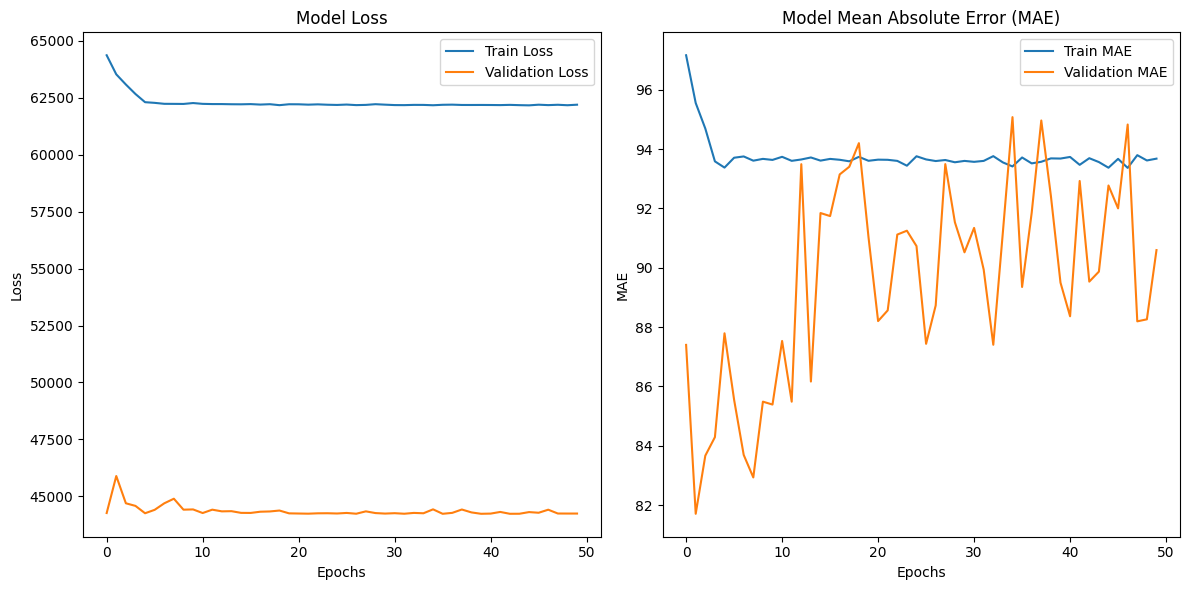

In [76]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
test_loss, test_mae, test_rmse = model.evaluate(x_test_dict, y_test)

# Print the RMSE (Root Mean Squared Error) for the test data
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test LOSS: {test_loss:.4f}")

382/382 [==============================] - 1s 3ms/step - loss: 44243.6719 - mae: 90.5968 - root_mean_squared_error: 210.3418
Test RMSE: 210.3418
Test MAE: 90.5968
Test LOSS: 44243.6719


##**Comparative Analysis of Predictive Models** <a name="comparative"></a>
In my pursuit of accurate price prediction , we explored the efficacy of different feature subsets using Artificial Neural Networks (ANN). The model evaluation yielded intriguing results:

Using All Features
```
Test RMSE: 206.7853
Test MAE: 71.9481
Test Loss: 42760.1602
```

Top 3 Features - Longitude, Latitude, Minimun Nights
```
Test RMSE: 210.3437
Test MAE: 88.2262
Test Loss: 44244.4805
```

Top 2 Features - Longitude, Latitude
```
Test RMSE: 210.3418
Test MAE: 90.5968
Test Loss: 44243.6719
```
My analysis showcases the importance of feature selection in predictive modeling. While using all available features achieved the lowest RMSE and MAE, the performance difference is marginal when compared to models using a reduced feature set.  feature selection can lead to more efficient models without significant sacrifices in predictive accuracy.